In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir = 'train'
validation_dir = 'validation'

In [4]:
train_elephants_dir = os.path.join(train_dir, 'elephants')  # directory with our training elephant pictures
train_tigers_dir = os.path.join(train_dir, 'tigers')  # directory with our training tiger pictures

validation_elephants_dir = os.path.join(validation_dir, 'elephants')  # directory with our validation elephant pictures
validation_tigers_dir = os.path.join(validation_dir, 'tigers')  # directory with our validation tiger pictures

In [5]:
num_elephants_tr = len(os.listdir(train_elephants_dir))
num_tigers_tr = len(os.listdir(train_tigers_dir))
num_elephants_val = len(os.listdir(validation_elephants_dir))
num_tigers_val = len(os.listdir(validation_tigers_dir))
total_train = num_elephants_tr + num_tigers_tr
total_val = num_elephants_val + num_tigers_val
print('total training elephant images:', num_elephants_tr)
print('total training tiger images:', num_tigers_tr)

print('total validation elephant images:', num_elephants_val)
print('total validation tiger images:', num_tigers_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training elephant images: 5
total training tiger images: 6
total validation elephant images: 3
total validation tiger images: 3
--
Total training images: 11
Total validation images: 6


In [6]:
batch_size = 2 #Batch size is reduced from 128 to 2 as sample data has only few images
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 11 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [9]:
print(train_data_gen.class_indices)

{'elephants': 0, 'tigers': 1}


In [10]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [13]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
5/5 [==============================] - 1s 202ms/step - loss: 4.3365 - accuracy: 0.5556 - val_loss: 0.5276 - val_accuracy: 0.6667
Epoch 2/5
5/5 [==============================] - 1s 129ms/step - loss: 1.8499 - accuracy: 0.5556 - val_loss: 1.0624 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 1s 146ms/step - loss: 0.8270 - accuracy: 0.5000 - val_loss: 0.6517 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 1s 126ms/step - loss: 0.5026 - accuracy: 0.7778 - val_loss: 0.6049 - val_accuracy: 0.6667
Epoch 5/5
5/5 [==============================] - 1s 132ms/step - loss: 0.5477 - accuracy: 0.7778 - val_loss: 0.5509 - val_accuracy: 0.6667


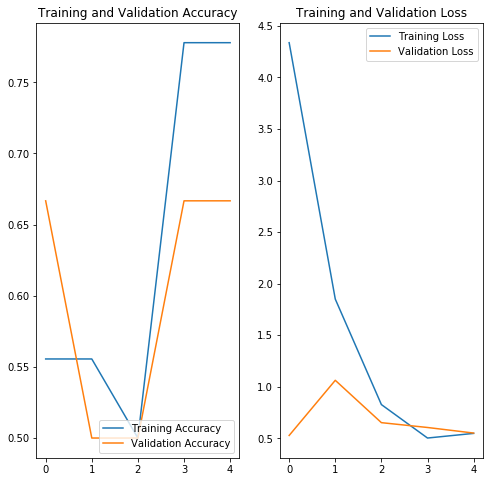

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model.save('binaryclassificationmodel.h5')